In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import data_processing as dp
from scipy import signal
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
import pywt
import os
import time
import h5py
from itertools import combinations

In [ ]:
Data = pd.read_csv('./processed data/dataframe_W256_S64_DWTLmax_samelabel_sc.csv')

# read file name of data with various Labels
df = pd.read_csv('./useful_data_label.csv',index_col=0) 
drop = 'G07_Freezing_Trial1_trial_1_emg.csv'
drop2= 'P812_M050_2_B_FoG_trial_2_emg.csv'
drop3= 'P812_M050_2_B_FoG_trial_1_emg.csv'
ind_drop = (df.columns!=drop)# & (df.columns!=drop2) & (df.columns!=drop3)
# read file name of data with only label 0
df2 = pd.read_csv('./unuseful_data_label.csv',index_col=0)
# read some of the data with only label 0
df3 = pd.read_csv('./data/file_name.txt',header=None)

files = np.concatenate([np.array(df.columns),np.array(df3.loc[:,0])])
ind = Data.File.isin(df.columns)
ind2 = Data.File == drop
#ind = (Data.File != drop) & (Data.File != drop2)
Data_sel = Data[ind]
Data_rest = Data[ind2]
#ind2 = Data_rest.File == drop
#Data_rest = Data_rest[ind2]
#Data_rest

In [88]:
for i in df.columns:
    print(i)

G04_FoG_trial_1_emg.csv
G04_FoG_trial_2_emg.csv
G06_FoG_trial_1_emg.csv
G06_FoG_trial_2_emg.csv
G06_FoG_trial_3_emg.csv
G07_Freezing_Trial1_trial_1_emg.csv
G08_FoG_1_trial_1_emg.csv
G08_FoG_2_trial_1_emg.csv
G11_FoG_trial_1_emg.csv
G11_FoG_trial_2_emg.csv
P379_M050_2_OFF_A_FoG_trial_1_emg.csv
P379_M050_2_OFF_A_FoG_trial_2_emg.csv
P379_M050_2_OFF_A_FoG_trial_3_emg.csv
P379_M050_2_OFF_B_FoG_trial_1_emg.csv
P379_M050_2_OFF_B_FoG_trial_2_emg.csv
P379_M050_2_OFF_B_FoG_trial_3_emg.csv
P551_M050_2_A_FoG_trial_1_emg.csv
P551_M050_2_B_FoG_trial_1_emg.csv
P551_M050_2_B_FoG_trial_2_emg.csv
P812_M050_2_B_FoG_trial_1_emg.csv
P812_M050_2_B_FoG_trial_2_emg.csv


In [7]:
feature = pd.DataFrame()
feature2 = pd.DataFrame()
y_ann = pd.DataFrame()
y2_ann = pd.DataFrame()
m = 0
for i in df.columns:
    print(i)
    ind = Data.File==i
    temp = Data[ind].reset_index(drop=True)
    ind3 = []
    ind4 = []
    for j in set(temp.Label):
        #ind2 = temp.Label == j
        #temp2 = temp[ind2]
        #l = len(temp2)
        #feature = pd.concat([feature,temp2.iloc[:int(0.8*l),1:-1]])
        #y_ann = pd.concat([y_ann,temp2.iloc[:int(0.8*l),0]])
        #feature2 = pd.concat([feature2,temp2.iloc[int(0.8*l):,1:-1]])
        #y2_ann = pd.concat([y2_ann,temp2.iloc[int(0.8*l):,0]])
        ind2 = np.where(temp.Label == j)[0].tolist()
        l_t = len(ind2)
        ind3 += ind2[:int(l_t*0.8)]
        ind4 += ind2[int(l_t*0.8):] 
    feature = pd.concat([feature,temp.iloc[ind3,1:-1]])
    y_ann = pd.concat([y_ann,temp.iloc[ind3,0]])
    feature2 = pd.concat([feature2,temp.iloc[ind4,1:-1]])
    y2_ann = pd.concat([y2_ann,temp.iloc[ind4,0]])
y_ann = np.array(y_ann)[:,0]
y2_ann = np.array(y2_ann)[:,0]

G04_FoG_trial_1_emg.csv
G04_FoG_trial_2_emg.csv
G06_FoG_trial_1_emg.csv
G06_FoG_trial_2_emg.csv
G06_FoG_trial_3_emg.csv
G07_Freezing_Trial1_trial_1_emg.csv
G08_FoG_1_trial_1_emg.csv
G08_FoG_2_trial_1_emg.csv
G11_FoG_trial_1_emg.csv
G11_FoG_trial_2_emg.csv
P379_M050_2_OFF_A_FoG_trial_1_emg.csv
P379_M050_2_OFF_A_FoG_trial_2_emg.csv
P379_M050_2_OFF_A_FoG_trial_3_emg.csv
P379_M050_2_OFF_B_FoG_trial_1_emg.csv
P379_M050_2_OFF_B_FoG_trial_2_emg.csv
P379_M050_2_OFF_B_FoG_trial_3_emg.csv
P551_M050_2_A_FoG_trial_1_emg.csv
P551_M050_2_B_FoG_trial_1_emg.csv
P551_M050_2_B_FoG_trial_2_emg.csv
P812_M050_2_B_FoG_trial_1_emg.csv
P812_M050_2_B_FoG_trial_2_emg.csv


In [53]:
feature_ann = pd.DataFrame()
y_ann = pd.DataFrame()
m = 0
for i in df.columns:
    #print(i)
    m+=1
    if i.find('G04')==0:
            continue
    ind = Data.File==i
    temp = Data[ind].reset_index(drop=True)

    feature_ann = pd.concat([feature_ann,temp.iloc[:,1:-1]])
    y_ann = pd.concat([y_ann,temp.iloc[:,0]])
    print(m,i,feature_ann.shape)
y_ann = np.array(y_ann)[:,0]

3 G06_FoG_trial_1_emg.csv (130, 232)
4 G06_FoG_trial_2_emg.csv (242, 232)
5 G06_FoG_trial_3_emg.csv (357, 232)
6 G07_Freezing_Trial1_trial_1_emg.csv (802, 232)
7 G08_FoG_1_trial_1_emg.csv (1530, 232)
8 G08_FoG_2_trial_1_emg.csv (2482, 232)
9 G11_FoG_trial_1_emg.csv (2584, 232)
10 G11_FoG_trial_2_emg.csv (2662, 232)
11 P379_M050_2_OFF_A_FoG_trial_1_emg.csv (2743, 232)
12 P379_M050_2_OFF_A_FoG_trial_2_emg.csv (2792, 232)
13 P379_M050_2_OFF_A_FoG_trial_3_emg.csv (2869, 232)
14 P379_M050_2_OFF_B_FoG_trial_1_emg.csv (2944, 232)
15 P379_M050_2_OFF_B_FoG_trial_2_emg.csv (3028, 232)
16 P379_M050_2_OFF_B_FoG_trial_3_emg.csv (3111, 232)
17 P551_M050_2_A_FoG_trial_1_emg.csv (3178, 232)
18 P551_M050_2_B_FoG_trial_1_emg.csv (3463, 232)
19 P551_M050_2_B_FoG_trial_2_emg.csv (3666, 232)
20 P812_M050_2_B_FoG_trial_1_emg.csv (3879, 232)
21 P812_M050_2_B_FoG_trial_2_emg.csv (4069, 232)


In [71]:
#generate cwt features
#files = np.concatenate([np.array(df.columns),np.array('正常/'+df3.loc[:,0])])
widths = [250]
files=np.array(df.columns)
for width in widths:
    features = np.zeros(shape=(0,32,250,8))
    labels = np.zeros(shape=(0))
    stride = 200
    i = 0
    for file in files:
        i += 1
        if file.find('G04')==0:
            continue
        print(file)
        feature,label = dp.pipeline_cwt('./data/'+file,width = width, 
                                           stride=stride,
                                           scaler=False,
                                           norm=True,
                                           width_c=32,
                                            wavelet='mexh',
                                           same_label=True,
                                           dropna=True,
                                           filt=None)

        features = np.concatenate([features,feature])
        labels = np.concatenate([labels,label])
        print(i,features.shape)

    print('save finished.')

G06_FoG_trial_1_emg.csv
3 (164, 32, 250, 8)
G06_FoG_trial_2_emg.csv
4 (302, 32, 250, 8)
G06_FoG_trial_3_emg.csv
5 (447, 32, 250, 8)
G07_Freezing_Trial1_trial_1_emg.csv
6 (1005, 32, 250, 8)
G08_FoG_1_trial_1_emg.csv
7 (1908, 32, 250, 8)
G08_FoG_2_trial_1_emg.csv
8 (3091, 32, 250, 8)
G11_FoG_trial_1_emg.csv
9 (3219, 32, 250, 8)
G11_FoG_trial_2_emg.csv
10 (3317, 32, 250, 8)
P379_M050_2_OFF_A_FoG_trial_1_emg.csv
11 (3418, 32, 250, 8)
P379_M050_2_OFF_A_FoG_trial_2_emg.csv
12 (3479, 32, 250, 8)
P379_M050_2_OFF_A_FoG_trial_3_emg.csv
13 (3576, 32, 250, 8)
P379_M050_2_OFF_B_FoG_trial_1_emg.csv
14 (3670, 32, 250, 8)
P379_M050_2_OFF_B_FoG_trial_2_emg.csv
15 (3775, 32, 250, 8)
P379_M050_2_OFF_B_FoG_trial_3_emg.csv
16 (3877, 32, 250, 8)
P551_M050_2_A_FoG_trial_1_emg.csv
17 (3960, 32, 250, 8)
P551_M050_2_B_FoG_trial_1_emg.csv
18 (4318, 32, 250, 8)
P551_M050_2_B_FoG_trial_2_emg.csv
19 (4568, 32, 250, 8)
P812_M050_2_B_FoG_trial_1_emg.csv
20 (4831, 32, 250, 8)
P812_M050_2_B_FoG_trial_2_emg.csv
21 (5073

In [58]:
ind1 = ((labels==1) | (labels==2) | (labels==6))
ind = np.where(ind1==True)
#print(ind)
oc = OneHotEncoder()
#y_02 = y.copy()
y_02 = oc.fit_transform(labels[ind1,np.newaxis]).toarray()

X_full,X_test,y_full,y_test = train_test_split(features[ind],y_02,test_size = 0.2,shuffle = True,random_state=123)

In [8]:
import tensorflow as tf
from tensorflow.keras import layers,Model,callbacks,regularizers,models
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split,cross_validate
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder,normalize,MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE,BorderlineSMOTE,ADASYN,SVMSMOTE

In [9]:
#ind = ((y[:20000]==1) | (y[:20000]==2) | (y[:20000]==3) | (y[:20000]==4) | (y[:20000]==6))
#y_02 = y[:20000]
#ind = ((y==1) | (y==2) | (y==3) | (y==4) | (y==6))
file = './processed data/cwt_W256_S64_Wc32_mexh_nm_split.hdf5'
with h5py.File(file,'r') as f:
    cwtmatr = f['features']
    y = f['labels'][...]
    cwtmatr2 = f['features2']
    y2 = f['labels2'][...]
    ind1 = ((y==1) | (y==2) | (y==6))
    ind = np.where(ind1==True)
    #print(ind)
    oc = OneHotEncoder()
    #y_02 = y.copy()
    y_02 = oc.fit_transform(y[ind1,np.newaxis]).toarray()
    #y_02[ind]=1
    ind2 = ((y2==1) | (y2==2) | (y2==6))
    ind22 = np.where(ind2==True)
    X2 = cwtmatr2[ind22]
    Y2 = oc.transform(y2[ind2,np.newaxis]).toarray()
    X_full,X_test,y_full,y_test = train_test_split(cwtmatr[ind],y_02,test_size = 0.2,shuffle = True,random_state=123)
    #X_full,X_test,y_full,y_test= train_test_split(X_full1,y_full1,test_size = 0.2,shuffle = True,random_state=123)
    #X_train,X_valid,y_train,y_valid= train_test_split(X_full,y_full,test_size = 0.2,random_state=555)

In [50]:
y.shape

(12862,)

In [81]:
def train_model(model,feature,y,binary=True,file=None):
    if binary:
        ind = ((y==0)|(y==1)|(y==2)|(y==6))
        #ind1 = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
        y_01 = y[ind].copy()
        ind1 = ((y_01==1)|(y_01==2)|(y_01==6))
        y_01[ind1] = 1
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:1,1:5}
    else:
        ind = ((y==1)|(y==2)|(y==6))
        #ind = ((y==1)|(y==6))
        y_01 = y[ind].copy()
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:5,1:1,2:1}#{0:2,1:1,2:10,3:2}
    x_full,x_test,y_full,y_test = train_test_split(np.array(feature)[ind,:],y_01,
                                                   test_size=0.2,
                                                   random_state=123,
                                                   shuffle=True)
    x_train,x_valid,y_train,y_valid = train_test_split(x_full,y_full,
                                                       test_size=0.25,
                                                       random_state=555,
                                                       shuffle=True)
    
    #sm = BorderlineSMOTE(random_state=50,kind='borderline-2')
    #sm = SMOTE(random_state=50)
    #print(y_full.shape)
    #x_full,y_full = sm.fit_resample(x_full,y_full)
    #print(y_full_n.shape)
    sc = StandardScaler(with_mean=True)
    #sc = MinMaxScaler()
    x_train = sc.fit_transform(x_full)
    pca = PCA(n_components=100)
    #x_train = pca.fit_transform(x_full)
    #x_valid = sc.transform(x_valid)
    x_test = sc.transform(x_test)
    #x_test = pca.transform(x_test)
    #x_train = x_full
    
    early_stopping = callbacks.EarlyStopping(patience = 10,
                                             monitor = 'val_loss', 
                                             restore_best_weights=True)
    history = model.fit([x_train,X_full],y_full,validation_data=([x_test,X_test],y_test),
                        epochs=300,batch_size=32,class_weight=cw,
                        callbacks=[early_stopping],
                        shuffle=True)
    
    if binary:
        y_pred_t=model.predict([x_test,X_test])
        test = metrics.accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1))
        #test = metrics.accuracy_score(y_test,y_pred_t>0.5)
        
        #y_pred_v=model.predict(x_valid)
        #valid = metrics.accuracy_score(y_valid,np.argmax(y_pred_v,axis=1))
        y_pred_ta=model.predict([x_train,X_full])
        train = metrics.accuracy_score(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1))
        #train = metrics.accuracy_score(y_full,y_pred_ta>0.5)
        
        print('train: \n',metrics.confusion_matrix(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1)))
        #print('valid: \n',metrics.confusion_matrix(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1)))
        print('test: \n',metrics.confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1)))
        
        #print('train: \n',metrics.confusion_matrix(y_full,y_pred_ta>0.5))
        #print('test: \n',metrics.confusion_matrix(y_test,y_pred_t>0.5))

    else:
        y_pred_t=model.predict([x_test,X_test])
        test = metrics.accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1))
        #y_pred_v=model.predict(x_valid)
        #valid = metrics.accuracy_score(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1))
        y_pred_ta=model.predict([x_train,X_full])
        train = metrics.accuracy_score(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1))        
        print('train: \n',metrics.confusion_matrix(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1)))
        #print('valid: \n',metrics.confusion_matrix(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1)))
        print('test: \n',metrics.confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1)))
    print('test:%f'%test)
    #print('valid:%f'%valid)
    print('train:%f'%train)
    if file != None:
        model.save_model(file)
    return train,test,sc,pca

def test_model(model,feature,y,sc,pca,binary=True):
    if binary:
        ind = ((y==0)|(y==1)|(y==2)|(y==3)|(y==4)|(y==6))
        #ind1 = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
        y_01 = y[ind].copy()
        ind1 = ((y_01==1)|(y_01==2)|(y_01==6))
        y_01[ind1] = 1
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:1,1:5}
    else:
        ind = ((y==1)|(y==2)|(y==6))
        #ind = ((y==1)|(y==6))
        y_01 = y[ind].copy()
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:5,1:1,2:1}#{0:2,1:1,2:10,3:2}

    #print(y_01)
    feature=sc.transform(feature[ind])
    #feature = feature[ind]
    #feature=pca.transform(feature)
    y_pred=model.predict([feature,X2])
    test = metrics.accuracy_score(np.argmax(y_01,axis=1),np.argmax(y_pred,axis=1))
    #test = metrics.accuracy_score(y_01,y_pred>0.5)
    
    print('acc:%f'%test)
    print(metrics.confusion_matrix(np.argmax(y_01,axis=1),np.argmax(y_pred,axis=1)))
    #print(metrics.confusion_matrix(y_01,y_pred>0.5))
    return test

def sparse_cost_sensitive_loss (y_true,y_pred):
    #cost_matrix = tf.constant([[0,1.,1,1.],
    #              [2,0,5,5],
    #              [1,1,0,1],
    #              [1.,2.,1,0]])
    cost_matrix = tf.constant([[0,2.,2],
                  [1,0,1],
                  [1.0,1.,0]])
    #cost_matrix = tf.constant([[0,1.],
    #              [5.,0]])
    batch_cost_matrix = tf.nn.embedding_lookup(cost_matrix, tf.argmax(y_true,axis=1))
    eps = 1e-6
    probability = tf.clip_by_value(y_pred, eps, 1-eps)
    cost_values = tf.math.log(1-probability)*batch_cost_matrix
    loss = tf.reduce_mean(-tf.reduce_sum(cost_values, axis=1))
    return loss

def output(model,x,y,sc):
    ind = ((y==1)|(y==2)|(y==6))
    y_01 = y[ind].copy()
    oc = OneHotEncoder()
    y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
    x=sc.transform(x[ind])
    y_pred = model.predict([x,X2])
    y_pred = (y_pred[:,:3])
    test = metrics.accuracy_score(np.argmax(y_01,axis=1),np.argmax(y_pred,axis=1))
    print('acc:%f'%test)
    print(metrics.confusion_matrix(np.argmax(y_01,axis=1),np.argmax(y_pred,axis=1)))

In [50]:
input_ann = layers.Input(shape=feature.shape[1:])#feature.shape[1:]
l1 = layers.Dense(128,activation='elu',
                  #kernel_initializer='lecun_normal',
                  #kernel_regularizer = regularizers.l2(0.001),
                 )(input_ann)
l1 = layers.Dropout(0.2)(l1)
#bn1 = layers.BatchNormalization()(l1)

l2 = layers.Dense(64,activation='elu',
                  #kernel_initializer='lecun_normal',
                  #kernel_regularizer = regularizers.l2(0.001),
                 )(l1)
l2 = layers.Dropout(0.2)(l2)
#bn2 = layers.BatchNormalization()(l2)

l3 = layers.Dense(32,activation='elu',
                  #kernel_initializer='lecun_normal',
                  #kernel_regularizer = regularizers.l2(0.001),
                 )(l2)
l3 = layers.Dropout(0.2)(l3)

#bn3 = layers.BatchNormalization()(l3)
l4 = layers.Dense(16,activation='elu',
                 #kernel_regularizer = regularizers.l2(0.001),
                 )(l3)
#l4 = layers.Dropout(0.2)(l4)

#l5 = layers.Dense(8,activation='relu')(drop4)
#drop5 = layers.Dropout(0.5)(l5)


input_cnn = layers.Input(shape=X_full.shape[1:])
#bn = layers.BatchNormalization()(input_)
max_pool = layers.MaxPooling2D((2,2))(input_cnn)
#bn = layers.BatchNormalization()(input_)
cnn1 = layers.Conv2D(16,3,strides=(1,1),
                      kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
                      padding='same')(max_pool)
cnn1 = layers.Activation('elu')(cnn1)
cnn1 = layers.Dropout(0.2)(cnn1)
#cnn1 = layers.BatchNormalization()(cnn1)
cnn1 = layers.MaxPooling2D((2,2))(cnn1)

cnn2 = layers.Conv2D(32,3,strides=(1,1),
                      kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
                      padding='same')(cnn1)
cnn2 = layers.Activation('elu')(cnn2)
cnn2 = layers.Dropout(0.2)(cnn2)
#cnn2 = layers.BatchNormalization()(cnn2)
cnn2 = layers.MaxPooling2D(2)(cnn2)

cnn3 = layers.Conv2D(64,3,strides=(1,1),
                      kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
                      padding='same')(cnn2)
cnn3 = layers.Activation('elu')(cnn3)
cnn3 = layers.Dropout(0.2)(cnn3)
#cnn3 = layers.BatchNormalization()(cnn3)
cnn3 = layers.MaxPooling2D(2)(cnn3)

cnn4 = layers.Conv2D(128,3,strides=(1,1),
                      kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
                      padding='same')(cnn3)
cnn4 = layers.Activation('elu')(cnn4)
cnn4 = layers.Dropout(0.2)(cnn4)
#cnn4 = layers.BatchNormalization()(cnn4)
cnn4 = layers.MaxPooling2D(2)(cnn4)
flatten = layers.Flatten()(cnn4)

#dropout = layers.Dropout(0.2)(flatten)
#dense1 = layers.Dense(256,activation = 'relu')(dropout)
#dense1 = layers.Dropout(0.2)(dense1)
#dense2 = layers.Dense(128,activation = 'relu')(dense1)
#dropout2 = layers.Dropout(0.2)(layer2)

concat = layers.Concatenate()([l4,flatten])

output = layers.Dense(3,activation='softmax')(concat)
model = Model(inputs=[input_ann,input_cnn],outputs=[output])

In [85]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
train,test,sc,pca = train_model(model,feature,np.array(y),False)

Epoch 1/300
213/213 [==============================] - 24s 110ms/step - loss: 0.6404 - accuracy: 0.7155 - val_loss: 0.5290 - val_accuracy: 0.7776
Epoch 2/300
213/213 [==============================] - 23s 107ms/step - loss: 0.5243 - accuracy: 0.7714 - val_loss: 0.4737 - val_accuracy: 0.7987
Epoch 3/300
213/213 [==============================] - 23s 108ms/step - loss: 0.4656 - accuracy: 0.7979 - val_loss: 0.5918 - val_accuracy: 0.7447
Epoch 4/300
213/213 [==============================] - 23s 109ms/step - loss: 0.4342 - accuracy: 0.8128 - val_loss: 0.4295 - val_accuracy: 0.8204
Epoch 5/300
213/213 [==============================] - 24s 111ms/step - loss: 0.4090 - accuracy: 0.8253 - val_loss: 0.4314 - val_accuracy: 0.8286
Epoch 6/300
213/213 [==============================] - 29s 135ms/step - loss: 0.3771 - accuracy: 0.8397 - val_loss: 0.4036 - val_accuracy: 0.8386
Epoch 7/300
213/213 [==============================] - 24s 112ms/step - loss: 0.3544 - accuracy: 0.8491 - val_loss: 0.3808 -

In [20]:
test_model(model,np.array(feature2),np.array(y2),sc,pca,False)

acc:0.738217
[[214 145 117]
 [143 900  34]
 [ 64  58 468]]


0.7382174521698553

In [89]:
model_ann = models.load_model('./model/ann2.h5')
model_cnn = models.load_model('./model/cnn2.h5')

In [ ]:
model_cnn.summary()

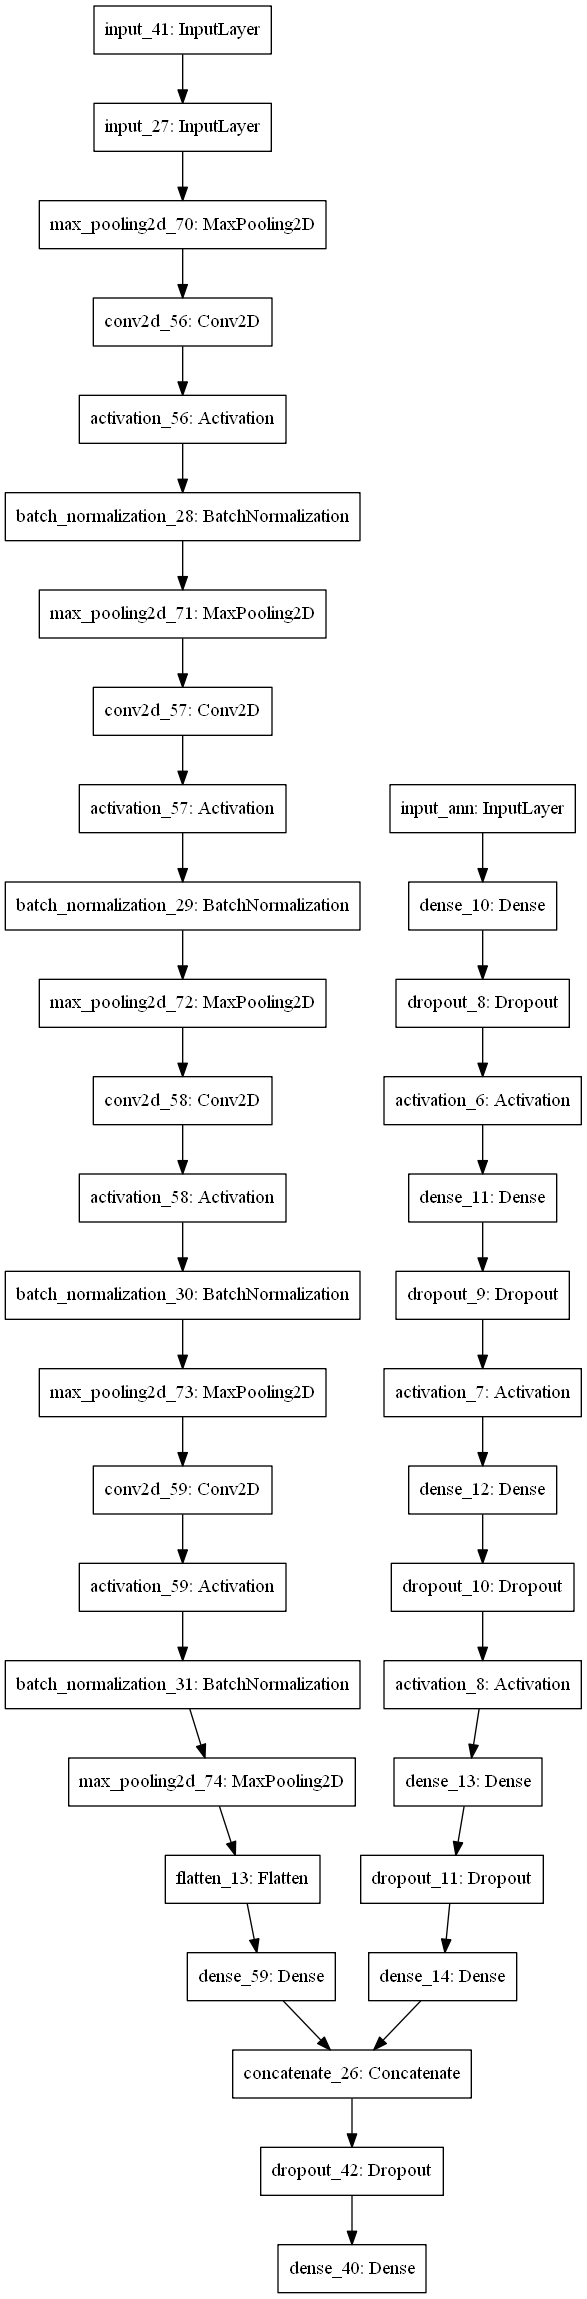

In [118]:
plot_model(model)

In [90]:
input_ann = layers.Input(shape=feature.shape[1:],name='input_ann')
ann = model_ann.layers[0](input_ann)
#ann.trainable = False
for layer in model_ann.layers[1:-2]:
    ann = layer(ann)
    ann.trainable = False
#model_ann = Model(inputs=[input_],outputs=[ann])

input_cnn = layers.Input(shape=X_full.shape[1:])
cnn = model_cnn.layers[0](input_cnn)
#cnn .trainable = False
for layer in model_cnn.layers[1:-1]:
    cnn = layer(cnn)
    cnn.trainable = False
#model_cnn = Model(inputs=[input_cnn],outputs=[cnn])
concat = layers.Concatenate()([ann,cnn])
dense1 = layers.Dense(1024,activation='relu',name='dense_concat')(concat)
#dense1 = layers.Dropout(0.2)(dense1)
#dense2 = layers.Dense(512,activation='relu')(dense1)
#dense2 = layers.Dropout(0.2)(dense2)
#dense3 = layers.Dense(256,activation='relu')(dense2)
#dense3 = layers.Dropout(0.2)(dense3)
dropout = layers.Dropout(0.2)(dense1)
output = layers.Dense(3,activation='softmax',name='output')(concat)

model = Model(inputs=[input_ann,input_cnn],outputs=[output])
#for layer in model.layers[:-4]:
#    layer.trainable=False
model.summary()

Model: "functional_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 32, 256, 8)] 0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            multiple             0           input_7[0][0]                    
__________________________________________________________________________________________________
max_pool (MaxPooling2D)         (None, 16, 128, 8)   0           input_5[1][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 128, 16)  1168        max_pool[1][0]                   
______________________________________________________________________________________

In [91]:
model.layers[2].trainable

True

In [92]:
model.compile(loss=sparse_cost_sensitive_loss,optimizer='adam',metrics=['accuracy'])

In [93]:
train,test,sc,pca = train_model(model,feature,y_ann,False)

Epoch 1/300
213/213 [==============================] - 23s 106ms/step - loss: 0.1951 - accuracy: 0.9339 - val_loss: 0.1628 - val_accuracy: 0.9548
Epoch 2/300
213/213 [==============================] - 24s 114ms/step - loss: 0.0269 - accuracy: 0.9943 - val_loss: 0.1309 - val_accuracy: 0.9619
Epoch 3/300
213/213 [==============================] - 21s 99ms/step - loss: 0.0196 - accuracy: 0.9962 - val_loss: 0.1590 - val_accuracy: 0.9448
Epoch 4/300
213/213 [==============================] - 21s 98ms/step - loss: 0.0227 - accuracy: 0.9938 - val_loss: 0.1862 - val_accuracy: 0.9472
Epoch 5/300
213/213 [==============================] - 21s 96ms/step - loss: 0.0199 - accuracy: 0.9950 - val_loss: 0.2447 - val_accuracy: 0.9184
Epoch 6/300
213/213 [==============================] - 21s 98ms/step - loss: 0.0145 - accuracy: 0.9963 - val_loss: 0.1634 - val_accuracy: 0.9437
Epoch 7/300
213/213 [==============================] - 23s 109ms/step - loss: 0.0267 - accuracy: 0.9921 - val_loss: 0.2584 - val

In [78]:
output(model,np.array(feature2),np.array(y2),sc)

TypeError: 'Tensor' object is not callable

In [94]:
test_model(model,np.array(feature2),np.array(y2),sc,pca,False)

acc:0.728418
[[199 169 108]
 [103 919  55]
 [ 89  58 443]]


0.728418105459636

In [64]:
def train_model(model,feature,y,binary=True,file=None):
    if binary:
        ind = ((y==0)|(y==1)|(y==2)|(y==6))
        #ind1 = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
        y_01 = y[ind].copy()
        ind1 = ((y_01==1)|(y_01==2)|(y_01==6))
        y_01[ind1] = 1
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:1,1:5}
    else:
        ind = ((y==1)|(y==2)|(y==6))
        #ind = ((y==1)|(y==6))
        y_01 = y[ind].copy()
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:5,1:1,2:1}#{0:2,1:1,2:10,3:2}
    x_full,x_test,y_full,y_test = train_test_split(np.array(feature)[ind,:],y_01,
                                                   test_size=0.2,
                                                   random_state=123,
                                                   shuffle=True)
    x_train,x_valid,y_train,y_valid = train_test_split(x_full,y_full,
                                                       test_size=0.25,
                                                       random_state=555,
                                                       shuffle=True)
    ind2 = ((Y2==1)|(Y2==2)|(Y2==6))
    y_02 = Y2[ind2].copy()
    y_02 = oc.transform(np.array(y_02)[:,np.newaxis]).toarray()

    
    early_stopping = callbacks.EarlyStopping(patience = 10,
                                             monitor = 'val_loss', 
                                             restore_best_weights=True)
    history = model.fit(x_full,y_full,validation_data=(x_test,y_test),
                        epochs=100,batch_size=32,class_weight=cw,
                        callbacks=[early_stopping],
                        shuffle=True)
    
    if binary:
        y_pred_t=model.predict(x_test)
        test = metrics.accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1))
        #test = metrics.accuracy_score(y_test,y_pred_t>0.5)
        
        #y_pred_v=model.predict(x_valid)
        #valid = metrics.accuracy_score(y_valid,np.argmax(y_pred_v,axis=1))
        y_pred_ta=model.predict(x_train)
        train = metrics.accuracy_score(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1))
        #train = metrics.accuracy_score(y_full,y_pred_ta>0.5)
        
        print('train: \n',metrics.confusion_matrix(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1)))
        #print('valid: \n',metrics.confusion_matrix(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1)))
        print('test: \n',metrics.confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1)))
        
        #print('train: \n',metrics.confusion_matrix(y_full,y_pred_ta>0.5))
        #print('test: \n',metrics.confusion_matrix(y_test,y_pred_t>0.5))

    else:
        y_pred_t=model.predict(x_test)
        test = metrics.accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1))
        #y_pred_v=model.predict(x_valid)
        #valid = metrics.accuracy_score(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1))
        y_pred_ta=model.predict(x_full)
        train = metrics.accuracy_score(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1))        
        print('train: \n',metrics.confusion_matrix(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1)))
        #print('valid: \n',metrics.confusion_matrix(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1)))
        print('test: \n',metrics.confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1)))
    print('test:%f'%test)
    #print('valid:%f'%valid)
    print('train:%f'%train)
    if file != None:
        model.save_model(file)
    return train,test

def test_model(model,feature,y):

    y_pred=model.predict(feature)
    test = metrics.accuracy_score(np.argmax(y,axis=1),np.argmax(y_pred,axis=1))
    #test = metrics.accuracy_score(y_01,y_pred>0.5)
    
    print('acc:%f'%test)
    print(metrics.confusion_matrix(np.argmax(y,axis=1),np.argmax(y_pred,axis=1)))
    #print(metrics.confusion_matrix(y_01,y_pred>0.5))
    return test

def test_model(model,feature,y,sc,pca):
    ind = ((y==1)|(y==2)|(y==6))
    y_01 = y[ind].copy()
    oc = OneHotEncoder()
    y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
    cw = None#{0:5,1:1,2:1}#{0:2,1:1,2:10,3:2}
    x_full,x_test,y_full,y_test = train_test_split(np.array(feature)[ind,:],y_01,
                                                   test_size=0.2,
                                                   random_state=123,
                                                   shuffle=True)

    #print(y_01)
    x_full=sc.transform(x_full)
    x_test=sc.transform(x_test)
    
    y_pred_t=model.predict(x_test)
    test = metrics.accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1))
    #y_pred_v=model.predict(x_valid)
    #valid = metrics.accuracy_score(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1))
    y_pred_ta=model.predict(x_full)
    train = metrics.accuracy_score(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1))        
    print('train: \n',metrics.confusion_matrix(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1)))
    #print('valid: \n',metrics.confusion_matrix(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1)))
    print('test: \n',metrics.confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1)))
    print('test:%f'%test)
    #print('valid:%f'%valid)
    print('train:%f'%train)
    return test

def test_model(model,feature,y,sc,pca):
    ind = ((y==1)|(y==2)|(y==6))
    y_01 = y[ind].copy()
    oc = OneHotEncoder()
    y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
    cw = None#{0:5,1:1,2:1}#{0:2,1:1,2:10,3:2}
    

    #print(y_01)
    x_full=sc.transform(np.array(feature)[ind,:])
    

    y_pred_ta=model.predict(x_full)
    train = metrics.accuracy_score(np.argmax(y_01,axis=1),np.argmax(y_pred_ta,axis=1))        
    print('train: \n',metrics.confusion_matrix(np.argmax(y_01,axis=1),np.argmax(y_pred_ta,axis=1)))

    print('train:%f'%train)
    return test

In [22]:
input_ = layers.Input(shape=X_full.shape[1:])
#bn = layers.BatchNormalization()(input_)
max_pool = layers.MaxPooling2D((2,2))(input_)
#bn = layers.BatchNormalization()(input_)

cnn1 = layers.Conv2D(16,3,strides=2,
                      kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
                      padding='same')(max_pool)
cnn1 = layers.Activation('relu')(cnn1)
cnn1 = layers.BatchNormalization()(cnn1)
#cnn1 = layers.MaxPooling2D((2,2))(cnn1)

cnn2 = layers.Conv2D(32,3,strides=2,
                      kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
                      padding='same')(cnn1)
cnn2 = layers.Activation('relu')(cnn2)
cnn2 = layers.BatchNormalization()(cnn2)
#cnn2 = layers.MaxPooling2D(2)(cnn2)

cnn3 = layers.Conv2D(64,3,strides=2,
                      kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
                      padding='same')(cnn2)
cnn3 = layers.Activation('relu')(cnn3)
cnn3 = layers.BatchNormalization()(cnn3)
#cnn3 = layers.MaxPooling2D(2)(cnn3)

cnn4 = layers.Conv2D(128,3,strides=2,
                      kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
                      padding='same')(cnn3)
cnn4 = layers.Activation('relu')(cnn4)
cnn4 = layers.BatchNormalization()(cnn4)
#cnn4 = layers.MaxPooling2D(2)(cnn4)

flatten = layers.Flatten()(cnn4)
#dropout = layers.Dropout(0.2)(flatten)
#layer1 = layers.Dense(256,activation = 'relu')(dropout)
#dropout1 = layers.Dropout(0.2)(layer1)
#layer2 = layers.Dense(128,activation = 'relu')(dropout1)
#dropout2 = layers.Dropout(0.2)(layer2)
output = layers.Dense(3,activation = 'softmax')(flatten)
model = Model(inputs=[input_],outputs=[output])

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
early_stopping = callbacks.EarlyStopping(patience = 10,monitor = 'val_accuracy', restore_best_weights=True)

In [39]:
train_model(model,features,labels,False)

NameError: name 'labels' is not defined

In [40]:
early_stopping = callbacks.EarlyStopping(patience = 10,
                                             monitor = 'val_loss', 
                                             restore_best_weights=True)
history = model_cnn.fit(X_full,y_full,validation_data=(X_test,y_test),
                        epochs=100,batch_size=32,#class_weight=cw,
                        callbacks=[early_stopping],
                        shuffle=True)

Epoch 1/100
213/213 [==============================] - 23s 106ms/step - loss: 0.0339 - accuracy: 0.9878 - val_loss: 0.1307 - val_accuracy: 0.9554
Epoch 2/100
213/213 [==============================] - 22s 103ms/step - loss: 0.0325 - accuracy: 0.9880 - val_loss: 0.1485 - val_accuracy: 0.9466
Epoch 3/100
213/213 [==============================] - 22s 102ms/step - loss: 0.0271 - accuracy: 0.9921 - val_loss: 0.1437 - val_accuracy: 0.9484
Epoch 4/100
213/213 [==============================] - 23s 106ms/step - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.1250 - val_accuracy: 0.9583
Epoch 5/100
213/213 [==============================] - 22s 104ms/step - loss: 0.0300 - accuracy: 0.9890 - val_loss: 0.1403 - val_accuracy: 0.9519
Epoch 6/100
213/213 [==============================] - 23s 106ms/step - loss: 0.0430 - accuracy: 0.9856 - val_loss: 0.1587 - val_accuracy: 0.9466
Epoch 7/100
213/213 [==============================] - 24s 112ms/step - loss: 0.0417 - accuracy: 0.9859 - val_loss: 0.1363 -

In [65]:
test_model(model_ann,feature2,y2_ann,sc,pca)

train: 
 [[176 156 144]
 [ 89 927  61]
 [ 39 108 443]]
train:0.721419


0.9970657276995305

In [61]:
y_pred=model.predict(X2)
metrics.confusion_matrix(np.argmax(Y2,axis=1),np.argmax(y_pred,axis=1))

ValueError: in user code:

    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:386 call
        inputs, training=training, mask=mask)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer max_pooling2d is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: [None, 232]


In [166]:
y_pred_t=model.predict(X_test)
test = metrics.accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1))
#y_pred_v=model.predict(x_valid)
#valid = metrics.accuracy_score(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1))
y_pred_ta=model.predict(X_full)
train = metrics.accuracy_score(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1))
print('test:%f'%test)
#print('valid:%f'%valid)
print('train:%f'%train)
print('train: \n',metrics.confusion_matrix(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1)))
#print('valid: \n',metrics.confusion_matrix(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1)))
print('test: \n',metrics.confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1)))

test:0.966549
train:1.000000
train: 
 [[1503    0    0]
 [   0 3425    0]
 [   0    0 1884]]
test: 
 [[371  10  10]
 [ 15 823   8]
 [  9   5 453]]


In [42]:
#model.save('./model/cnn3.h5')

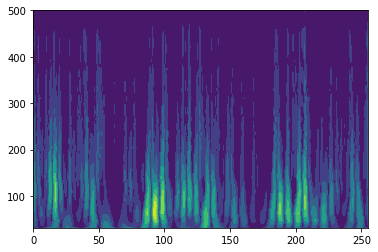

In [72]:
t = np.arange(0,256)
f=np.array([500.   , 484.375, 468.75 , 453.125, 437.5  , 421.875, 406.25 ,
       390.625, 375.   , 359.375, 343.75 , 328.125, 312.5  , 296.875,
       281.25 , 265.625, 250.   , 234.375, 218.75 , 203.125, 187.5  ,
       171.875, 156.25 , 140.625, 125.   , 109.375,  93.75 ,  78.125,
        62.5  ,  46.875,  31.25,32 ])
plt.contourf(t, f, abs(X_full[381,:,:,2]))